# 5.1 dataframe类创建和基础操作 

1. 用pandas导入数据（sql、excel）
2. 用DataFrame创建

`import pandas as pd
df = pd.DataFrame([1,2,3,4],
            columns=['numbers'],#列名称
            index=['A','B','C','D']#行名称)`
 3. DataFrame对象的典型操作
 
 `
 df.index #显示行名称和类型
 df.columns#显示列名称和类型
 df.loc[]#通过名称获取子集
 df.iloc[]#通过数字，如第几行第几列而不是名称获取子集
 df.sum()
 df.apply(lambda x:x ** 2)
 df['names']= pd.DataFrame(['张三','李四','张飞','张武'],index=['A','B','C','D'])#添加列数据,需要指定index
 df.append({})#根据字典添加行数据,会丢失原索引信息
 df.append(pd.DataFrame()#根据DataFrame对象添加行，原索引信息保留`，

In [20]:
import pandas as pd
df = pd.DataFrame([1,2,3,4],
            columns=['numbers'],#列名称
            index=['A','B','C','D'])#行名称
df

,numbers
A,1
B,2
C,3
D,4


In [21]:
df['names']= pd.DataFrame(['张三','李四','张飞','张武'],index=['A','B','C','D'])
df

,numbers,names
A,1,张三
B,2,李四
C,3,张飞
D,4,张武


In [22]:
df.append({'numbers':5, 'names':'jack'},ignore_index=True)

,numbers,names
0,1,张三
1,2,李四
2,3,张飞
3,4,张武
4,5,jack


In [25]:
df.append(pd.DataFrame({'numbers':5, 'names':'jack'},index=['E']))

,numbers,names
A,1,张三
B,2,李四
C,3,张飞
D,4,张武
E,5,jack


# 5.2 基本分析

df.info()#提供数据、列和索引元信息\
df.describe()#每列的汇总统计\
<span style="border-style: double;border-width:5px;border-color: #6659BA;border-radius: 6px;color:#C7C7C7;">df.sum()
</span>\
<span style="border-style: double;border-width:5px;border-color: #6659BA;border-radius: 6px;color:#C7C7C7;">df.mean()
</span>\
<span style="border-style: double;border-width:5px;border-color: #6659BA;border-radius: 6px;color:#C7C7C7;">df.cumsum</span>#axis=0列计算/1行计算\
与numpy相结合\
`
np.mean(df)
np.log(df)
np.sqrt(abs(df))
`


# 5.3可视化 

## 5.3.1 matplotlib

In [75]:
import pandas as pd
tips = pd.read_csv('D:/Users/MERRY/Jupyter/python金融大数据分析（edition 2）/seaborn-data-master/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 直方图（单变量分组后的频率分布）

<ipython-input-78-f82b7379662c>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


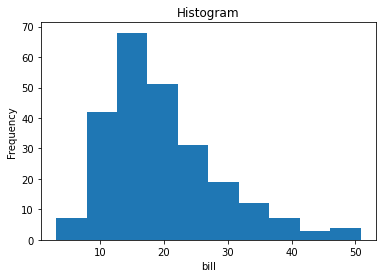

In [78]:
import matplotlib.pyplot as plt
fig = plt.figure()#创建画布
axes1 = fig.add_subplot(1,1,1)#创建1*1画布，指定axes1为第一个，其实也只有一个子图
axes1.hist(tips['total_bill'],bins=10)#数据间隔为10
axes1.set_title('Histogram')#图命名
axes1.set_xlabel('bill')#x轴标签
axes1.set_ylabel('Frequency')#y轴标签
fig.show()


### 散点图（描述双变量）

<ipython-input-79-f6d823e9539d>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


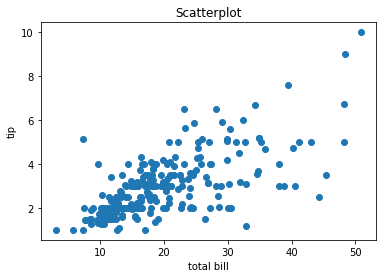

In [79]:
fig = plt.figure()#创建画布
axes1 = fig.add_subplot(1,1,1)#创建1*1画布，指定axes1为第一个，其实也只有一个子图
axes1.scatter(tips['total_bill'],tips['tip'])
axes1.set_title('Scatterplot')
axes1.set_xlabel('total bill')
axes1.set_ylabel('tip')
fig.show()

### 箱型图（离散变量随连续变量变化呈现的分布）

<ipython-input-80-1c65d2d676f6>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


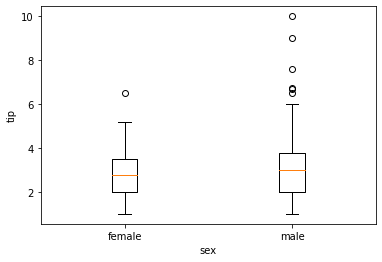

In [80]:
fig = plt.figure()#创建画布
axes1 = fig.add_subplot(1,1,1)#创建1*1画布，指定axes1为第一个，其实也只有一个子图
axes1.boxplot(
    [tips[tips['sex']== 'Female']['tip'],
    tips[tips['sex']== 'Male']['tip']],#男女的tip数据
    labels=['female','male'])#男女tip数据的箱型图命名axes1.set_title('Scatterplot')
axes1.set_xlabel('sex')
axes1.set_ylabel('tip')
fig.show()

### 三变量（如男女的total bill和tip的比较）

<ipython-input-81-9701ecfec1e8>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


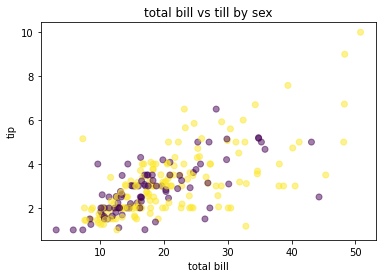

In [81]:
#将男女性别根据不同点来表示
def recode_sex(sex):
    if sex == 'Female':
        return 0
    else:
        return 1
tips['sex_color'] = tips['sex'].apply(recode_sex)
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)#创建1*1画布，指定axes1为第一个，其实也只有一个子图
axes1.scatter(
                x=tips['total_bill'],
                y=tips['tip'],
                c=tips['sex_color'],#为每个点根据性别设置颜色
                alpha=0.5)#alpha设置透明度，可以看出点的集中程度
axes1.set_title('total bill vs till by sex')
axes1.set_xlabel('total bill')
axes1.set_ylabel('tip')
fig.show()


### 四变量（如男女的total bill和tip的比较，还要体现每桌就餐人数）就餐人数用原点大小表示

<ipython-input-85-1694064aa030>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


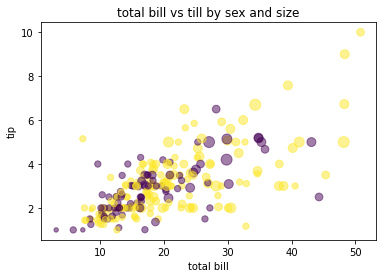

In [85]:
#将男女性别根据不同点来表示
def recode_sex(sex):
    if sex == 'Female':
        return 0
    else:
        return 1
tips['sex_color'] = tips['sex'].apply(recode_sex)
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)#创建1*1画布，指定axes1为第一个，其实也只有一个子图
axes1.scatter(
                x=tips['total_bill'],
                y=tips['tip'],
                s=tips['size']*20,
                c=tips['sex_color'],#为每个点根据性别设置颜色
                alpha=0.5)#alpha设置透明度，可以看出点的集中程度
axes1.set_title('total bill vs till by sex and size')
axes1.set_xlabel('total bill')
axes1.set_ylabel('tip')
fig.show()


## 5.3.2 seaborn画图

### 热力图

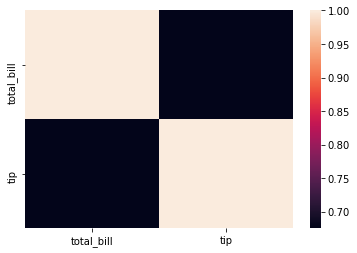

In [97]:
cor=tips.loc[:,['total_bill','tip']].corr()
heatm= sns.heatmap(cor)

### 蜂巢图 （双变量装箱并展示频率分布情况）

Text(0.5, 0.98, 'hexbin')

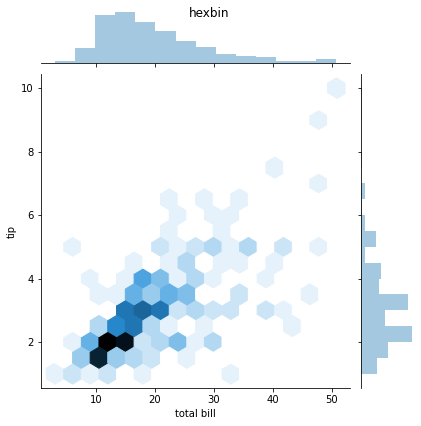

In [100]:
hexbin = sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')#jointplot不用创建画布，直接指定数据和画图类型
hexbin.set_axis_labels(xlabel='total bill',ylabel='tip')
hexbin.fig.suptitle('hexbin')
#默认单独展示两变量的频率分布

### 2D密度图（用颜色反映每一点的密度）

Text(0.5, 0.98, 'hexbin')

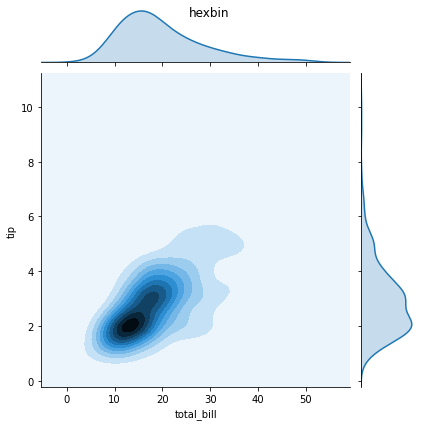

In [102]:
kde = sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')#jointplot不用创建画布，直接指定数据和画图类型
hexbin.set_axis_labels(xlabel='total bill',ylabel='tip')
kde.fig.suptitle('hexbin')
#默认单独展示两变量的kde

# 5.4 groupby操作 （相当于excel透视功能）

1. 根据单个指标分组

`
groups = df.groupby('sex')
groups.mean()#分组后每列均值
groups.max()#分组后每列最大值
groups.aggregate([min,max]).round(2)#分组后每列最大值最小值，并保留两位小数
`
2. 根据多个指标分组

`
groups = df.groupby(['sex','size'])
`

## 5.5 复杂选择

1. 得到布尔型对象

`df['x'] > 0.5
(df['x'] > 0) & (df['y'] < 0)  #两个条件都要符合
(df['x'] > 0) | (df['y'] < 0)  #两个条件符合一个就行`
2. 根据布尔对象选择

`df[df['x'] > 0.5]
df[(df['x'] > 0) & (df['y'] < 0)]  #两个条件都要符合
df[(df['x'] > 0) | (df['y'] < 0)]  #两个条件符合一个就行`
3. 用query方法传递字符串对象

`df.query('x > 0.5')
df.query('x > 0 & y < 0')#两个条件都要符合`